## INTRODUCTION TO SCIKIT LEARN

In [ ]:
# Machine learning models learn from experience
# 1) Labeled examples(Email Spam), 2) User Feedback(Clicks on Search Page), 3) Surrounding Environments(SelfDriving Cars)
# In Supervised Learning 1) Classification: targets are discrete, 2) Regression: targets are continuous
# In Unsupervised Learning 1) Clustering: Similar Users 2) Outlier Detection: Abnormal Patterns


# SciPy
# SciPy is a Python library that supports data manipulation and analysis methods that are commonly used in scientific computing. 
# So this includes support for statistical distributions, optimization of functions, linear algebra, and a variety of specialized mathematical functions.

In [88]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

fruits = pd.read_table('Fruits.txt')
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [89]:
# key = dict(zip((fruits.fruit_label.unique()),(fruits.fruit_name.unique())))
# key

fruits.fruit_label.unique()
fruits.fruit_name.unique()
key = {}
for i in range(len(fruits.fruit_label.unique())):
    key[fruits.fruit_label.unique()[i]] = fruits.fruit_name.unique()[i]
key

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

In [90]:
attributes = fruits[['mass','width','height','color_score']]
label = fruits['fruit_label']
X_train, X_test, Y_train, Y_test = train_test_split(attributes,label, random_state = 0, test_size=0.2)

In [91]:
len(X_train), len(X_test), len(Y_train), len(Y_test)

(47, 12, 47, 12)

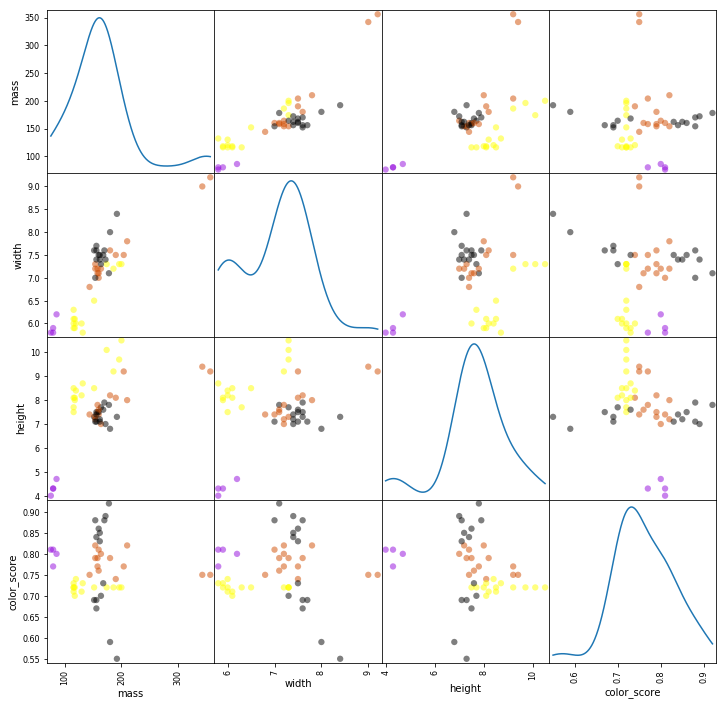

In [92]:
from matplotlib import cm
from pandas.plotting import scatter_matrix
cmap = cm.get_cmap('gnuplot')
scatter = scatter_matrix(X_train, c = Y_train, marker = 'o', s = 40,diagonal='kde' , figsize = (12,12), cmap = cmap) # hist_kwds = {'bins':15}

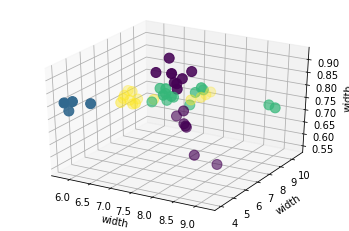

In [93]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_train['width'],X_train['height'],X_train['color_score'], c = Y_train, marker = 'o', s= 100)
ax.set_xlabel('width')
ax.set_ylabel('width')
ax.set_zlabel('width')
plt.show()

###  K-Nearest Neighbor

In [95]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5) # Tells ke kitnay neighbors ke close hona hai and majority vote wins
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [96]:
knn.score(X_test, Y_test)

0.5833333333333334

In [107]:
fruit_pred = knn.predict_proba([[158, 7.1, 7.2, 0.79]])
fruit_pred

array([[0.2, 0. , 0.8, 0. ]])

In [112]:
X_train.head()

,mass,width,height,color_score
30,158,7.1,7.5,0.79
41,180,7.6,8.2,0.79
33,190,7.5,8.1,0.74
42,154,7.2,7.2,0.82
48,174,7.3,10.1,0.72


In [110]:
fruits.iloc[30]

fruit_label                     3
fruit_name                 orange
fruit_subtype    selected_seconds
mass                          158
width                         7.1
height                        7.5
color_score                  0.79
Name: 30, dtype: object

In [115]:
# fruit_pred.index(max(fruit_pred))
key[fruit_pred.argmax()+1]

'orange'

In [118]:
df = fruits

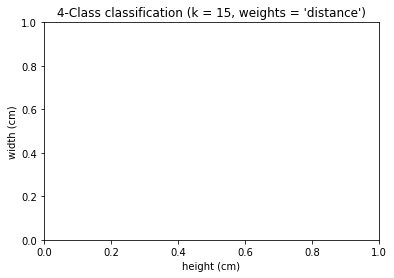

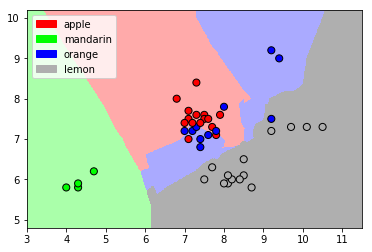

In [124]:
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches
import matplotlib.patches as mpatches
X = df[['mass', 'width', 'height', 'color_score']]
y = df['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

def plot_fruit_knn(X, y, n_neighbors, weights):
    X_mat = X[['height', 'width']].values
    y_mat = y.values
# Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF','#AFAFAF'])
    cmap_bold  = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#AFAFAF'])
    clf = KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X_mat, y_mat)
# Plot the decision boundary by assigning a color in the color map
    # to each mesh point.

    mesh_step_size = .01  # step size in the mesh
    plot_symbol_size = 50

    x_min, x_max = X_mat[:, 0].min() - 1, X_mat[:, 0].max() + 1
    y_min, y_max = X_mat[:, 1].min() - 1, X_mat[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),
                         np.arange(y_min, y_max, mesh_step_size))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
# Plot training points
    plt.scatter(X_mat[:, 0], X_mat[:, 1], s=plot_symbol_size, c=y, cmap=cmap_bold, edgecolor = 'black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    patch0 = mpatches.Patch(color='#FF0000', label='apple')
    patch1 = mpatches.Patch(color='#00FF00', label='mandarin')
    patch2 = mpatches.Patch(color='#0000FF', label='orange')
    patch3 = mpatches.Patch(color='#AFAFAF', label='lemon')
    plt.legend(handles=[patch0, patch1, patch2, patch3])
plt.xlabel('height (cm)')
plt.ylabel('width (cm)')
plt.title("4-Class classification (k = %i, weights = '%s')" % (n_neighbors, weights))    
plt.show()
plot_fruit_knn(X_train, y_train, 5, 'uniform')

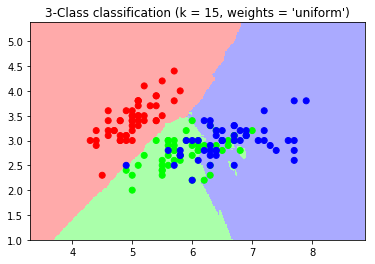

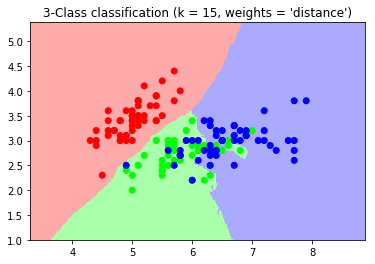

In [123]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 15

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()

## Supervised Machine Learning